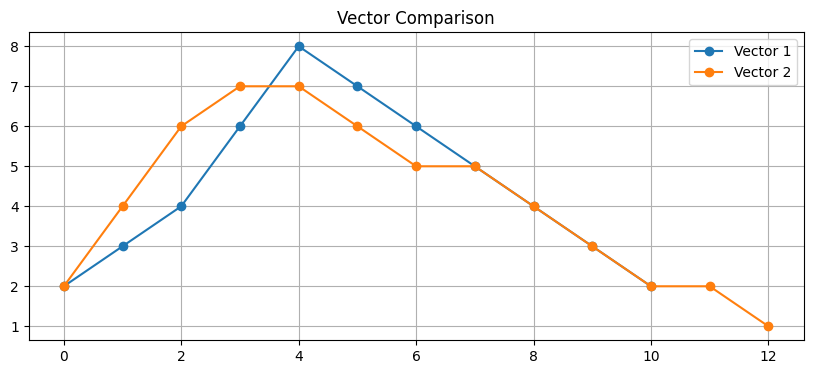

In [1]:
import numpy as np
import matplotlib.pyplot as plt

v1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
v2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])

plt.figure(figsize=(10,4))
plt.plot(v1, marker='o', label='Vector 1')
plt.plot(v2, marker='o', label='Vector 2')
plt.title("Vector Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
def dtw(x, y):
    n, m = len(x), len(y)
    cost = np.zeros((n, m))

    # local distance (absolute difference)
    for i in range(n):
        for j in range(m):
            cost[i, j] = abs(x[i] - y[j])

    # accumulated cost matrix
    acc_cost = np.zeros((n, m))
    acc_cost[0, 0] = cost[0, 0]

    # fill first row & column
    for i in range(1, n):
        acc_cost[i, 0] = cost[i, 0] + acc_cost[i-1, 0]
    for j in range(1, m):
        acc_cost[0, j] = cost[0, j] + acc_cost[0, j-1]

    # fill the matrix
    for i in range(1, n):
        for j in range(1, m):
            acc_cost[i, j] = cost[i, j] + min(
                acc_cost[i-1, j],      # insertion
                acc_cost[i, j-1],      # deletion
                acc_cost[i-1, j-1]     # match
            )

    # backtracking for optimal warping path
    i, j = n-1, m-1
    path = [(i, j)]

    while (i > 0 or j > 0):
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            step = np.argmin([acc_cost[i-1, j], acc_cost[i, j-1], acc_cost[i-1, j-1]])
            if step == 0:
                i -= 1
            elif step == 1:
                j -= 1
            else:
                i -= 1
                j -= 1
        path.append((i, j))

    path.reverse()
    return acc_cost, path


In [3]:
acc_cost, path = dtw(v1, v2)
dtw_distance = acc_cost[-1, -1]
dtw_distance


np.float64(3.0)

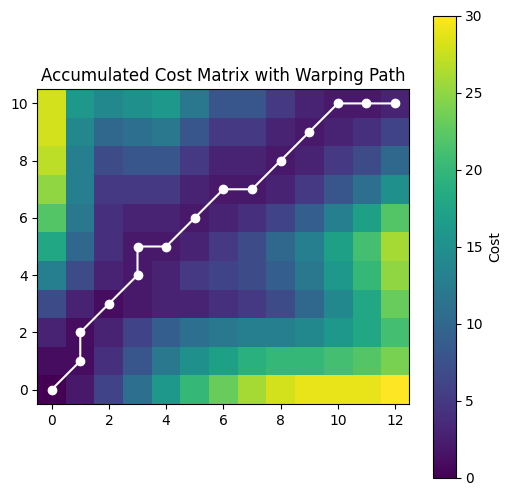

In [4]:
plt.figure(figsize=(6,6))
plt.imshow(acc_cost, cmap='viridis', origin='lower')
plt.title("Accumulated Cost Matrix with Warping Path")

path_x = [p[1] for p in path]
path_y = [p[0] for p in path]
plt.plot(path_x, path_y, marker='o', color='white')

plt.colorbar(label="Cost")
plt.show()
